In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [76]:
idade = pd.Series(np.random.randint(15,50,1000))

In [77]:
deficiencia = pd.Series(np.random.randint(0,3,1000))

0 não apresenta deficiência 


1 apresenta deficiência visual


2 apresenta deficiência auditiva

In [78]:
deficiencia.value_counts()

1    336
0    335
2    329
dtype: int64

In [79]:
cpf = pd.Series(np.random.randint(10000,50000,1000))

In [80]:
visitante_tipo = pd.Series(np.random.randint(0,2,1000))

In [81]:
tempo_medio_min = pd.Series(np.random.randint(1,121,1000))

tempo médio é composto pelos acessos/tempo online em loja física

In [82]:
cols = ['deficiencia','cpf','idade','visitante_tipo','tempo_medio_min']

In [89]:
series = [deficiencia,cpf,idade,visitante_tipo,tempo_medio_min]

In [111]:
df = pd.DataFrame(columns=cols)

In [112]:
df.deficiencia = deficiencia
df.cpf = cpf
df.idade = idade
df.visitante_tipo = visitante_tipo
df.tempo_medio_min = tempo_medio_min

In [113]:
df

,deficiencia,cpf,idade,visitante_tipo,tempo_medio_min
0,1,49782,29,0,52
1,2,38202,39,0,96
2,0,29841,46,0,35
3,1,35566,49,0,77
4,1,35044,38,0,112
...,...,...,...,...,...
995,2,36539,34,0,81
996,2,28665,19,0,100
997,2,30929,33,1,52
998,0,21386,22,0,80


In [119]:
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=4)

In [121]:
clus.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [122]:
df['grupos'] = clus.labels_

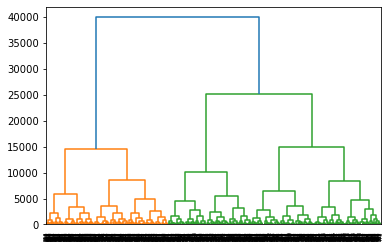

In [125]:
dend = shc.dendrogram(shc.linkage(df, method='complete'))

In [130]:
df2 = df.copy()

In [132]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deficiencia,1000.0,0.994,0.815248,0.0,0.00,1.0,2.00,2.0
cpf,1000.0,29838.113,11371.116412,10000.0,20277.75,29513.0,39577.75,49968.0
idade,1000.0,31.605,10.211525,15.0,22.00,31.0,41.00,49.0
visitante_tipo,1000.0,0.511,0.500129,0.0,0.00,1.0,1.00,1.0
tempo_medio_min,1000.0,59.556,34.591436,1.0,29.00,60.0,90.00,120.0
grupos,1000.0,1.259,1.139833,0.0,0.00,1.0,2.00,3.0


In [136]:
faixas_etarias = [0,15,22,31,41,50]

In [137]:
df['faixa_etaria'] = pd.cut(df['idade'], faixas_etarias)

<AxesSubplot:xlabel='faixa_etaria'>

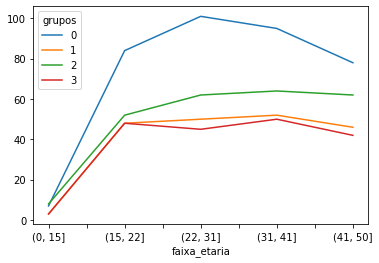

In [145]:
pd.crosstab(df['faixa_etaria'], df['grupos']).plot()

In [148]:
faixa_tempo = [0,29,60,90,121]

In [152]:
df['faixa_tempo'] = pd.cut(df['tempo_medio_min'], faixa_tempo)

<AxesSubplot:xlabel='faixa_tempo'>

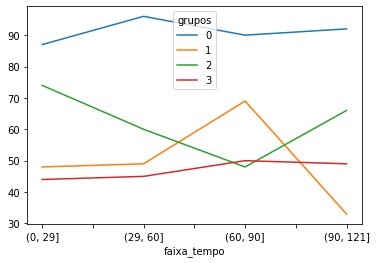

In [153]:
pd.crosstab(df['faixa_tempo'],df['grupos']).plot()